In [1]:
%pip install tensorflow
%pip install numpy
%pip install pandas
%pip install matplotlib

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# CANAPE, Cyrus Benjamin C.
# ESGUERRA, Edrine Frances A.

from pathlib import Path
import imghdr
import os

data_dir = "hair_types" #change relative path
image_extensions = [".png", ".jpg"]  # add there all your images file extensions

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
            os.remove(filepath)
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")
            os.remove(filepath)

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

image_size = (64, 64)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "hair_types/", #change relative path
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    labels='inferred',
    label_mode='categorical'
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "hair_types/", #change relative path
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size, 
    labels='inferred',
    label_mode='categorical'
)

Found 981 files belonging to 3 classes.
Using 785 files for training.
Found 981 files belonging to 3 classes.
Using 196 files for validation.


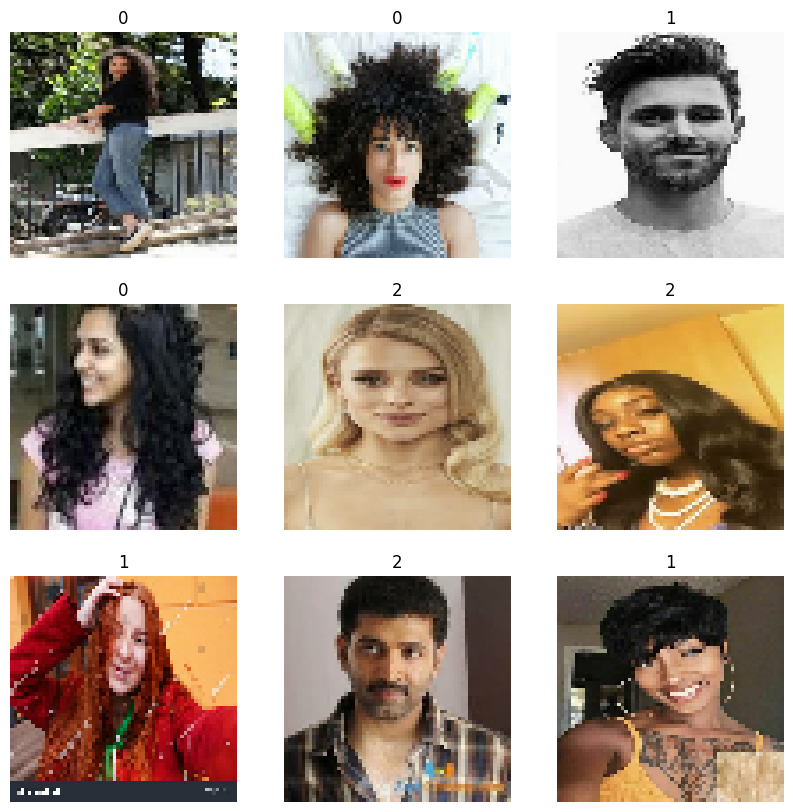

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(np.argmax(labels[i])))
        plt.axis("off")
plt.show()

Base Model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense

# Base model
base_model = Sequential()
base_model.add(keras.Input(shape=image_size + (3,)))
base_model.add(layers.Rescaling(1.0 / 255))

# First Convolutional Block
base_model.add(layers.Conv2D(filters=4, kernel_size=16, strides=1, padding='valid', dilation_rate=1))
base_model.add(layers.Activation("relu"))

# Second Convolutional Block
base_model.add(layers.Conv2D(filters=8, kernel_size=8, strides=1, padding='valid', dilation_rate=1))
base_model.add(layers.Activation("relu"))

# Third Convolutional Block
base_model.add(layers.Conv2D(filters=16, kernel_size=4, strides=1, padding='valid', dilation_rate=1))
base_model.add(layers.Activation("relu"))

# Global Average Pooling and Dense Layers
base_model.add(layers.GlobalAveragePooling2D())
base_model.add(layers.Dense(64))
base_model.add(layers.Activation("relu"))
base_model.add(layers.Dense(3))
base_model.add(layers.Activation("softmax"))

# Compile
base_model.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

Base Model with More Layers

In [ ]:
# Base model WITH More Layers
base_model_layers = Sequential()
base_model_layers.add(keras.Input(shape=image_size + (3,)))
base_model_layers.add(layers.Rescaling(1.0 / 255))

# First Convolutional Block
base_model_layers.add(layers.Conv2D(filters=4, kernel_size=16, strides=1, padding='valid', dilation_rate=1))
base_model_layers.add(layers.Activation("relu"))

# Second Convolutional Block
base_model_layers.add(layers.Conv2D(filters=8, kernel_size=8, strides=1, padding='valid', dilation_rate=1))
base_model_layers.add(layers.Activation("relu"))

# Third Convolutional Block
base_model_layers.add(layers.Conv2D(filters=16, kernel_size=4, strides=1, padding='valid', dilation_rate=1))
base_model_layers.add(layers.Activation("relu"))

# Fourth Convolutional Block
base_model_layers.add(layers.Conv2D(filters=32, kernel_size=2, strides=1, padding='valid', dilation_rate=1))
base_model_layers.add(layers.Activation("relu"))

# Fifth Convolutional Block
base_model_layers.add(layers.Conv2D(filters=64, kernel_size=1, strides=1, padding='valid', dilation_rate=1))
base_model_layers.add(layers.Activation("relu"))

# Global Average Pooling and Dense Layers
base_model_layers.add(layers.GlobalAveragePooling2D())
base_model_layers.add(layers.Dense(64))
base_model_layers.add(layers.Activation("relu"))
base_model_layers.add(layers.Dense(3))
base_model_layers.add(layers.Activation("softmax"))

# Compile
base_model_layers.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])


Base Model with More Filters

In [ ]:
# Base model WITH More Filters
base_model_filters = Sequential()
base_model_filters.add(keras.Input(shape=image_size + (3,)))
base_model_filters.add(layers.Rescaling(1.0 / 255))

# First Convolutional Block
base_model_filters.add(layers.Conv2D(filters=16, kernel_size=16, strides=1, padding='valid', dilation_rate=1))
base_model_filters.add(layers.Activation("relu"))

# Second Convolutional Block
base_model_filters.add(layers.Conv2D(filters=32, kernel_size=8, strides=1, padding='valid', dilation_rate=1))
base_model_filters.add(layers.Activation("relu"))

# Third Convolutional Block
base_model_filters.add(layers.Conv2D(filters=64, kernel_size=4, strides=1, padding='valid', dilation_rate=1))
base_model_filters.add(layers.Activation("relu"))

# Global Average Pooling and Dense Layers
base_model_filters.add(layers.GlobalAveragePooling2D())
base_model_filters.add(layers.Dense(64))
base_model_filters.add(layers.Activation("relu"))
base_model_filters.add(layers.Dense(3))
base_model_filters.add(layers.Activation("softmax"))

# Compile
base_model_filters.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

Base Model with More Kernel Size

In [ ]:
# Base model WITH More Kernel Size
base_model_kernel_size = Sequential()
base_model_kernel_size.add(keras.Input(shape=image_size + (3,)))
base_model_kernel_size.add(layers.Rescaling(1.0 / 255))

# First Convolutional Block
base_model_kernel_size.add(layers.Conv2D(filters=4, kernel_size=32, strides=1, padding='valid', dilation_rate=1))
base_model_kernel_size.add(layers.Activation("relu"))

# Second Convolutional Block
base_model_kernel_size.add(layers.Conv2D(filters=8, kernel_size=16, strides=1, padding='valid', dilation_rate=1))
base_model_kernel_size.add(layers.Activation("relu"))

# Third Convolutional Block
base_model_kernel_size.add(layers.Conv2D(filters=16, kernel_size=8, strides=1, padding='valid', dilation_rate=1))
base_model_kernel_size.add(layers.Activation("relu"))

# Global Average Pooling and Dense Layers
base_model_kernel_size.add(layers.GlobalAveragePooling2D())
base_model_kernel_size.add(layers.Dense(64))
base_model_kernel_size.add(layers.Activation("relu"))
base_model_kernel_size.add(layers.Dense(3))
base_model_kernel_size.add(layers.Activation("softmax"))

# Compile
base_model_kernel_size.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

Base Model with Dilation Rate

In [ ]:
# Base model WITH More Dilation Rate
base_model_dilation = Sequential()
base_model_dilation.add(keras.Input(shape=image_size + (3,)))
base_model_dilation.add(layers.Rescaling(1.0 / 255))

# First Convolutional Block
base_model_dilation.add(layers.Conv2D(filters=4, kernel_size=16, strides=1, padding='valid', dilation_rate=1))
base_model_dilation.add(layers.Activation("relu"))

# Second Convolutional Block
base_model_dilation.add(layers.Conv2D(filters=8, kernel_size=8, strides=1, padding='valid', dilation_rate=2))
base_model_dilation.add(layers.Activation("relu"))

# Third Convolutional Block
base_model_dilation.add(layers.Conv2D(filters=16, kernel_size=4, strides=1, padding='valid', dilation_rate=4))
base_model_dilation.add(layers.Activation("relu"))

# Global Average Pooling and Dense Layers
base_model_dilation.add(layers.GlobalAveragePooling2D())
base_model_dilation.add(layers.Dense(64))
base_model_dilation.add(layers.Activation("relu"))
base_model_dilation.add(layers.Dense(3))
base_model_dilation.add(layers.Activation("softmax"))

# Compile
base_model_dilation.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

Base Model with Higher Learning Rate

In [ ]:
from tensorflow.keras.optimizers import Adam

# Base model WITH Higher Learning Rate
base_model_higher_learning_rate = Sequential()
base_model_higher_learning_rate.add(keras.Input(shape=image_size + (3,)))
base_model_higher_learning_rate.add(layers.Rescaling(1.0 / 255))

# First Convolutional Block
base_model_higher_learning_rate.add(layers.Conv2D(filters=4, kernel_size=16, strides=1, padding='valid', dilation_rate=1))
base_model_higher_learning_rate.add(layers.Activation("relu"))

# Second Convolutional Block
base_model_higher_learning_rate.add(layers.Conv2D(filters=8, kernel_size=8, strides=1, padding='valid', dilation_rate=1))
base_model_higher_learning_rate.add(layers.Activation("relu"))

# Third Convolutional Block
base_model_higher_learning_rate.add(layers.Conv2D(filters=16, kernel_size=4, strides=1, padding='valid', dilation_rate=1))
base_model_higher_learning_rate.add(layers.Activation("relu"))

# Global Average Pooling and Dense Layers
base_model_higher_learning_rate.add(layers.GlobalAveragePooling2D())
base_model_higher_learning_rate.add(layers.Dense(64))
base_model_higher_learning_rate.add(layers.Activation("relu"))
base_model_higher_learning_rate.add(layers.Dense(3))
base_model_higher_learning_rate.add(layers.Activation("softmax"))

# Set a higher learning rate (e.g., 0.01)
optimizer = Adam(learning_rate=0.01)

# Compile
base_model_higher_learning_rate.compile(optimizer=optimizer,
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

Base Model with Lower Learning Rate

In [ ]:
# Base model WITH Lower Learning Rate
base_model_lower_learning_rate = Sequential()
base_model_lower_learning_rate.add(keras.Input(shape=image_size + (3,)))
base_model_lower_learning_rate.add(layers.Rescaling(1.0 / 255))

# First Convolutional Block
base_model_lower_learning_rate.add(layers.Conv2D(filters=4, kernel_size=16, strides=1, padding='valid', dilation_rate=1))
base_model_lower_learning_rate.add(layers.Activation("relu"))

# Second Convolutional Block
base_model_lower_learning_rate.add(layers.Conv2D(filters=8, kernel_size=8, strides=1, padding='valid', dilation_rate=1))
base_model_lower_learning_rate.add(layers.Activation("relu"))

# Third Convolutional Block
base_model_lower_learning_rate.add(layers.Conv2D(filters=16, kernel_size=4, strides=1, padding='valid', dilation_rate=1))
base_model_lower_learning_rate.add(layers.Activation("relu"))

# Global Average Pooling and Dense Layers
base_model_lower_learning_rate.add(layers.GlobalAveragePooling2D())
base_model_lower_learning_rate.add(layers.Dense(64))
base_model_lower_learning_rate.add(layers.Activation("relu"))
base_model_lower_learning_rate.add(layers.Dense(3))
base_model_lower_learning_rate.add(layers.Activation("softmax"))

# Set a lower learning rate (e.g., 0.0001)
optimizer = Adam(learning_rate=0.0001)

# Compile
base_model_lower_learning_rate.compile(optimizer=optimizer,
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

Base Model with Dropout Rate

In [ ]:
# Base model WITH Dropout Rate
base_model_dropout_rate = Sequential()
base_model_dropout_rate.add(keras.Input(shape=image_size + (3,)))
base_model_dropout_rate.add(layers.Rescaling(1.0 / 255))

# First Convolutional Block
base_model_dropout_rate.add(layers.Conv2D(filters=4, kernel_size=16, strides=1, padding='valid', dilation_rate=1))
base_model_dropout_rate.add(layers.Activation("relu"))

# Second Convolutional Block
base_model_dropout_rate.add(layers.Conv2D(filters=8, kernel_size=8, strides=1, padding='valid', dilation_rate=1))
base_model_dropout_rate.add(layers.Activation("relu"))

# Third Convolutional Block
base_model_dropout_rate.add(layers.Conv2D(filters=16, kernel_size=4, strides=1, padding='valid', dilation_rate=1))
base_model_dropout_rate.add(layers.Activation("relu"))

# Global Average Pooling and Dense Layers
base_model_dropout_rate.add(layers.GlobalAveragePooling2D())
base_model_dropout_rate.add(layers.Dense(64))
base_model_dropout_rate.add(layers.Activation("relu"))
base_model_dropout_rate.add(layers.Dropout(0.5)) # Dropout layer added here (e.g., 50% dropout)
base_model_dropout_rate.add(layers.Dense(3))
base_model_dropout_rate.add(layers.Activation("softmax"))

# Compile
base_model_dropout_rate.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

Base Model with Batch Normalization

In [ ]:
# Base model WITH Batch Normalization
base_model_batch_normalization = Sequential()
base_model_batch_normalization.add(keras.Input(shape=image_size + (3,)))
base_model_batch_normalization.add(layers.Rescaling(1.0 / 255))

# First Convolutional Block
base_model_batch_normalization.add(layers.Conv2D(filters=4, kernel_size=16, strides=1, padding='valid', dilation_rate=1))
base_model_batch_normalization.add(layers.BatchNormalization()) #batch normalization
base_model_batch_normalization.add(layers.Activation("relu"))

# Second Convolutional Block
base_model_batch_normalization.add(layers.Conv2D(filters=8, kernel_size=8, strides=1, padding='valid', dilation_rate=1))
base_model_batch_normalization.add(layers.BatchNormalization()) #batch normalization
base_model_batch_normalization.add(layers.Activation("relu"))

# Third Convolutional Block
base_model_batch_normalization.add(layers.Conv2D(filters=16, kernel_size=4, strides=1, padding='valid', dilation_rate=1))
base_model_batch_normalization.add(layers.BatchNormalization()) #batch normalization
base_model_batch_normalization.add(layers.Activation("relu"))

# Global Average Pooling and Dense Layers
base_model_batch_normalization.add(layers.GlobalAveragePooling2D())
base_model_batch_normalization.add(layers.Dense(64))
base_model_batch_normalization.add(layers.BatchNormalization()) #batch normalization
base_model_batch_normalization.add(layers.Activation("relu"))
base_model_batch_normalization.add(layers.Dense(3))
base_model_batch_normalization.add(layers.Activation("softmax"))

# Compile
base_model_batch_normalization.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

Base Model with Max Pooling

In [ ]:
# Base model WITH Max Pooling
base_model_max_pool = Sequential()
base_model_max_pool.add(keras.Input(shape=image_size + (3,)))
base_model_max_pool.add(layers.Rescaling(1.0 / 255))

# First Convolutional Block
base_model_max_pool.add(layers.Conv2D(filters=4, kernel_size=16, strides=1, padding='valid', dilation_rate=1))
base_model_max_pool.add(layers.Activation("relu"))
base_model_max_pool.add(layers.MaxPooling2D(pool_size=(2, 2)))  # Added max pooling here

# Second Convolutional Block
base_model_max_pool.add(layers.Conv2D(filters=8, kernel_size=8, strides=1, padding='valid', dilation_rate=1))
base_model_max_pool.add(layers.Activation("relu"))
base_model_max_pool.add(layers.MaxPooling2D(pool_size=(2, 2)))  # Added max pooling here

# Third Convolutional Block
base_model_max_pool.add(layers.Conv2D(filters=16, kernel_size=4, strides=1, padding='valid', dilation_rate=1))
base_model_max_pool.add(layers.Activation("relu"))
base_model_max_pool.add(layers.MaxPooling2D(pool_size=(2, 2)))  # Added max pooling here

# Global Average Pooling and Dense Layers
base_model_max_pool.add(layers.GlobalAveragePooling2D())
base_model_max_pool.add(layers.Dense(64))
base_model_max_pool.add(layers.Activation("relu"))
base_model_max_pool.add(layers.Dense(3))
base_model_max_pool.add(layers.Activation("softmax"))

# Compile
base_model_max_pool.compile(optimizer='adam',
                            loss='categorical_crossentropy',
                            metrics=['accuracy'])


Training

In [ ]:
# Train Base Model
history_base = base_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20
)

Epoch 1/20


25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 127ms/step - accuracy: 0.3467 - loss: 1.1059 - val_accuracy: 0.2887 - val_loss: 1.0988
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 165ms/step - accuracy: 0.3548 - loss: 1.0984 - val_accuracy: 0.2887 - val_loss: 1.0996
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 178ms/step - accuracy: 0.3404 - loss: 1.0984 - val_accuracy: 0.2887 - val_loss: 1.1003
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 266ms/step - accuracy: 0.3627 - loss: 1.0979 - val_accuracy: 0.2887 - val_loss: 1.1014
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.3533 - loss: 1.0974 - val_accuracy: 0.2887 - val_loss: 1.1018
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 0.3454 - loss: 1.0984 - val_accuracy: 0.2887 - val_loss: 1.1023
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - accuracy: 0.3582 - loss: 1.0972 - val_accuracy: 0.2887 - val_loss: 1.1022
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.3594 - loss: 1.0977 - val_accuracy: 0.2887 - val_los

In [ ]:
# Train WITH more Layers
history_base_layers = base_model_layers.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20
)


Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 199ms/step - accuracy: 0.3500 - loss: 1.0993 - val_accuracy: 0.2887 - val_loss: 1.1001
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 238ms/step - accuracy: 0.3537 - loss: 1.0961 - val_accuracy: 0.2887 - val_loss: 1.0979
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 231ms/step - accuracy: 0.3818 - loss: 1.0604 - val_accuracy: 0.3144 - val_loss: 1.1488
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 290ms/step - accuracy: 0.4422 - loss: 1.0450 - val_accuracy: 0.4330 - val_loss: 1.0653
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 311ms/step - accuracy: 0.4923 - loss: 1.0227 - val_accuracy: 0.4278 - val_loss: 1.0567
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 242ms/step - accuracy: 0.5050 - loss: 0.9915 - val_accuracy: 0.4381 - val_loss: 1.0720
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 244ms/step - accuracy: 0.5306 - loss: 0.9507 - val_accuracy: 0.4381 - val_loss: 1.0588
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 391ms/step - accuracy: 0.5178 - loss: 0.9569 - val_accuracy: 0

In [ ]:
# Train WITH more Filters
history_base_filters = base_model_filters.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20
)


Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 14s 433ms/step - accuracy: 0.3410 - loss: 1.1053 - val_accuracy: 0.2887 - val_loss: 1.0996
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 391ms/step - accuracy: 0.3445 - loss: 1.0958 - val_accuracy: 0.2887 - val_loss: 1.0953
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 338ms/step - accuracy: 0.3514 - loss: 1.0714 - val_accuracy: 0.4381 - val_loss: 1.0952
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 328ms/step - accuracy: 0.4125 - loss: 1.0874 - val_accuracy: 0.3711 - val_loss: 1.0881
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 326ms/step - accuracy: 0.4786 - loss: 1.0448 - val_accuracy: 0.4330 - val_loss: 1.0768
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 323ms/step - accuracy: 0.4959 - loss: 1.0393 - val_accuracy: 0.3814 - val_loss: 1.0791
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 336ms/step - accuracy: 0.4825 - loss: 1.0085 - val_accuracy: 0.4330 - val_loss: 1.0671
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 323ms/step - accuracy: 0.5162 - loss: 0.9905 - val_accuracy: 

In [ ]:
# Train WITH more Kernel Size
history_base_kernel_size = base_model_kernel_size.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20
)



Epoch 1/20


25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 213ms/step - accuracy: 0.3189 - loss: 1.1036 - val_accuracy: 0.2887 - val_loss: 1.0986
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 219ms/step - accuracy: 0.3710 - loss: 1.0983 - val_accuracy: 0.2887 - val_loss: 1.0998
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 211ms/step - accuracy: 0.3534 - loss: 1.0979 - val_accuracy: 0.2887 - val_loss: 1.1007
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 226ms/step - accuracy: 0.3438 - loss: 1.0992 - val_accuracy: 0.2887 - val_loss: 1.1014
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 261ms/step - accuracy: 0.3512 - loss: 1.0984 - val_accuracy: 0.2887 - val_loss: 1.1009
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 239ms/step - accuracy: 0.3252 - loss: 1.0994 - val_accuracy: 0.2887 - val_loss: 1.1021
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 252ms/step - accuracy: 0.3723 - loss: 1.0965 - val_accuracy: 0.2887 - val_loss: 1.1037
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 263ms/step - accuracy: 0.3454 - loss: 1.0991 - val_accuracy: 0.2887 - val_

In [ ]:
# Train WITH more Dilation
history_base_dilation = base_model_dilation.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20
)



Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 155ms/step - accuracy: 0.3967 - loss: 1.0963 - val_accuracy: 0.4072 - val_loss: 1.0814
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 149ms/step - accuracy: 0.4397 - loss: 1.0407 - val_accuracy: 0.4433 - val_loss: 1.0600
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.5110 - loss: 0.9859 - val_accuracy: 0.4485 - val_loss: 1.0597
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 161ms/step - accuracy: 0.4875 - loss: 0.9775 - val_accuracy: 0.4691 - val_loss: 1.0324
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 144ms/step - accuracy: 0.5140 - loss: 0.9557 - val_accuracy: 0.4588 - val_loss: 1.1497
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 141ms/step - accuracy: 0.5571 - loss: 0.9403 - val_accuracy: 0.5309 - val_loss: 1.0274
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 163ms/step - accuracy: 0.5259 - loss: 0.9321 - val_accuracy: 0.4381 - val_loss: 1.0765
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 177ms/step - accuracy: 0.5670 - loss: 0.9184 - val_accuracy: 0.

In [ ]:
# Train WITH higher learning rate
history_base_higher_learning_rate = base_model_higher_learning_rate.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20
)



Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 158ms/step - accuracy: 0.3077 - loss: 1.1527 - val_accuracy: 0.2887 - val_loss: 1.1043
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 134ms/step - accuracy: 0.3475 - loss: 1.0961 - val_accuracy: 0.2887 - val_loss: 1.1000
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 159ms/step - accuracy: 0.3559 - loss: 1.1005 - val_accuracy: 0.2887 - val_loss: 1.1010
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 159ms/step - accuracy: 0.3583 - loss: 1.0986 - val_accuracy: 0.2887 - val_loss: 1.1020
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 146ms/step - accuracy: 0.3710 - loss: 1.0970 - val_accuracy: 0.2887 - val_loss: 1.1037
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 168ms/step - accuracy: 0.3589 - loss: 1.0978 - val_accuracy: 0.2887 - val_loss: 1.1021
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 134ms/step - accuracy: 0.3523 - loss: 1.0972 - val_accuracy: 0.2887 - val_loss: 1.1005
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 135ms/step - accuracy: 0.3715 - loss: 1.0982 - val_accuracy: 0.

In [ ]:
# Train WITH lower learning rate
history_base_lower_learning_rate = base_model_lower_learning_rate.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20
)



Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 153ms/step - accuracy: 0.2578 - loss: 1.0990 - val_accuracy: 0.2887 - val_loss: 1.0986
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 164ms/step - accuracy: 0.3631 - loss: 1.0983 - val_accuracy: 0.2887 - val_loss: 1.0986
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 165ms/step - accuracy: 0.3443 - loss: 1.0983 - val_accuracy: 0.2887 - val_loss: 1.0987
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 184ms/step - accuracy: 0.3792 - loss: 1.0974 - val_accuracy: 0.2887 - val_loss: 1.0985
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 176ms/step - accuracy: 0.3274 - loss: 1.0971 - val_accuracy: 0.2887 - val_loss: 1.0998
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 160ms/step - accuracy: 0.3505 - loss: 1.0926 - val_accuracy: 0.2887 - val_loss: 1.0992
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 166ms/step - accuracy: 0.3429 - loss: 1.0848 - val_accuracy: 0.2887 - val_loss: 1.1007
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 163ms/step - accuracy: 0.3564 - loss: 1.0686 - val_accuracy: 0.

In [ ]:
# Train WITH drop rate
history_base_dropout_rate = base_model_dropout_rate.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20
)



Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 160ms/step - accuracy: 0.3192 - loss: nan - val_accuracy: 0.3866 - val_loss: 1.0961
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 173ms/step - accuracy: 0.3378 - loss: nan - val_accuracy: 0.3866 - val_loss: 1.0965
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 163ms/step - accuracy: 0.3447 - loss: nan - val_accuracy: 0.3866 - val_loss: 1.0967
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 164ms/step - accuracy: 0.3183 - loss: nan - val_accuracy: 0.3866 - val_loss: 1.0969
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 153ms/step - accuracy: 0.3193 - loss: nan - val_accuracy: 0.3866 - val_loss: 1.0975
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 163ms/step - accuracy: 0.3243 - loss: nan - val_accuracy: 0.3866 - val_loss: 1.0984
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 163ms/step - accuracy: 0.3635 - loss: nan - val_accuracy: 0.4175 - val_loss: 1.0984
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 159ms/step - accuracy: 0.3546 - loss: nan - val_accuracy: 0.2887 - val_loss: 1.0999


In [ ]:
# Train WITH batch normalization
history_base_batch_normalization = base_model_batch_normalization.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20
)



Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 173ms/step - accuracy: 0.4734 - loss: 1.0861 - val_accuracy: 0.2732 - val_loss: 1.1273
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 191ms/step - accuracy: 0.5535 - loss: 0.9290 - val_accuracy: 0.4124 - val_loss: 1.0933
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 174ms/step - accuracy: 0.5865 - loss: 0.8794 - val_accuracy: 0.3763 - val_loss: 1.0879
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 189ms/step - accuracy: 0.5814 - loss: 0.8627 - val_accuracy: 0.3814 - val_loss: 1.0767
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 166ms/step - accuracy: 0.5987 - loss: 0.8467 - val_accuracy: 0.4021 - val_loss: 1.0673
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 191ms/step - accuracy: 0.6312 - loss: 0.7987 - val_accuracy: 0.4227 - val_loss: 1.0373
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 180ms/step - accuracy: 0.6282 - loss: 0.7797 - val_accuracy: 0.4330 - val_loss: 1.0495
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 177ms/step - accuracy: 0.6145 - loss: 0.8066 - val_accuracy: 0.

In [ ]:
# Train WITH max pooling
history_base_max_pool = base_model_max_pool.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20
)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 158ms/step - accuracy: 0.3830 - loss: 1.0941 - val_accuracy: 0.3763 - val_loss: 1.0816
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 159ms/step - accuracy: 0.4555 - loss: 1.0502 - val_accuracy: 0.4588 - val_loss: 1.0440
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 170ms/step - accuracy: 0.4853 - loss: 0.9955 - val_accuracy: 0.5052 - val_loss: 1.0296
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 135ms/step - accuracy: 0.4787 - loss: 0.9832 - val_accuracy: 0.4175 - val_loss: 1.0694
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 146ms/step - accuracy: 0.5450 - loss: 0.9599 - val_accuracy: 0.5155 - val_loss: 1.0074
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 151ms/step - accuracy: 0.5417 - loss: 0.9298 - val_accuracy: 0.4639 - val_loss: 1.0064
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 163ms/step - accuracy: 0.5401 - loss: 0.9200 - val_accuracy: 0.4021 - val_loss: 1.1277
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 140ms/step - accuracy: 0.4961 - loss: 0.9713 - val_accuracy: 0.

Plots

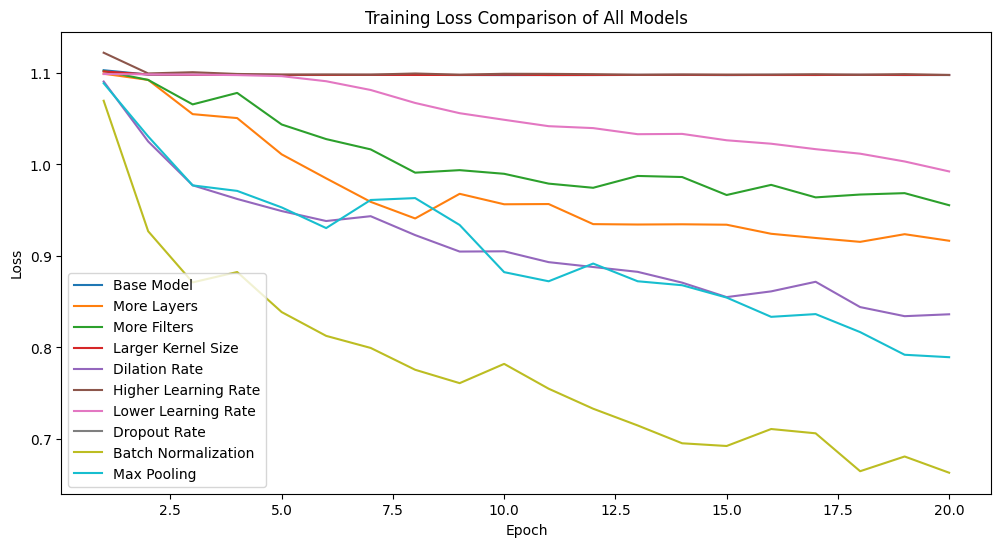

In [ ]:
# Extract training loss
loss_base = history_base.history['loss']
loss_layer = history_base_layers.history['loss']
loss_filters = history_base_filters.history['loss']
loss_kernel_size = history_base_kernel_size.history['loss']
loss_dilation = history_base_dilation.history['loss']
loss_higher_learning_rate = history_base_higher_learning_rate.history['loss']
loss_lower_learning_rate = history_base_lower_learning_rate.history['loss']
loss_dropout_rate = history_base_dropout_rate.history['loss']
loss_batch_normalization = history_base_batch_normalization.history['loss']
loss_max_pool = history_base_max_pool.history['loss']


epochs = range(1, len(loss_base) + 1)

# Plot
plt.figure(figsize=(12, 6))

plt.plot(epochs, loss_base, label='Base Model')
plt.plot(epochs, loss_layer, label='More Layers')
plt.plot(epochs, loss_filters, label='More Filters')
plt.plot(epochs, loss_kernel_size, label='Larger Kernel Size')
plt.plot(epochs, loss_dilation, label='Dilation Rate')
plt.plot(epochs, loss_higher_learning_rate, label='Higher Learning Rate')
plt.plot(epochs, loss_lower_learning_rate, label='Lower Learning Rate')
plt.plot(epochs, loss_dropout_rate, label='Dropout Rate')
plt.plot(epochs, loss_batch_normalization, label='Batch Normalization')
plt.plot(epochs, loss_max_pool, label='Max Pooling')
 

plt.title('Training Loss Comparison of All Models')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

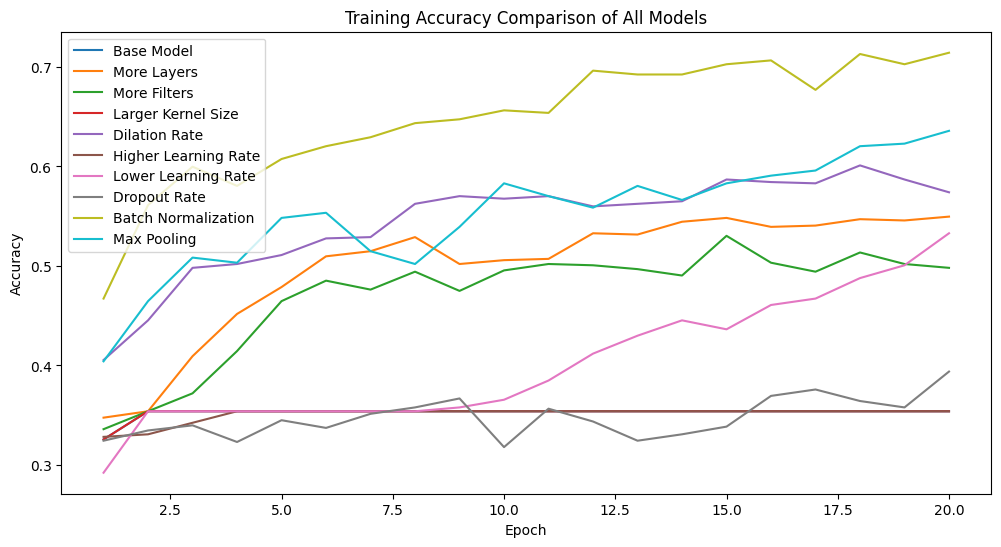

In [ ]:
# Extract training accuracy
acc_base = history_base.history['accuracy']
acc_layer = history_base_layers.history['accuracy']
acc_filters = history_base_filters.history['accuracy']
acc_kernel_size = history_base_kernel_size.history['accuracy']
acc_dilation = history_base_dilation.history['accuracy']
acc_higher_learning_rate = history_base_higher_learning_rate.history['accuracy']
acc_lower_learning_rate = history_base_lower_learning_rate.history['accuracy']
acc_dropout_rate = history_base_dropout_rate.history['accuracy']
acc_batch_normalization = history_base_batch_normalization.history['accuracy']
acc_max_pool = history_base_max_pool.history['accuracy']


# Plot
plt.figure(figsize=(12, 6))

plt.plot(epochs, acc_base, label='Base Model')
plt.plot(epochs, acc_layer, label='More Layers')
plt.plot(epochs, acc_filters, label='More Filters')
plt.plot(epochs, acc_kernel_size, label='Larger Kernel Size')
plt.plot(epochs, acc_dilation, label='Dilation Rate')
plt.plot(epochs, acc_higher_learning_rate, label='Higher Learning Rate')
plt.plot(epochs, acc_lower_learning_rate, label='Lower Learning Rate')
plt.plot(epochs, acc_dropout_rate, label='Dropout Rate')
plt.plot(epochs, acc_batch_normalization, label='Batch Normalization')
plt.plot(epochs, acc_max_pool, label='Max Pooling')

plt.title('Training Accuracy Comparison of All Models')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



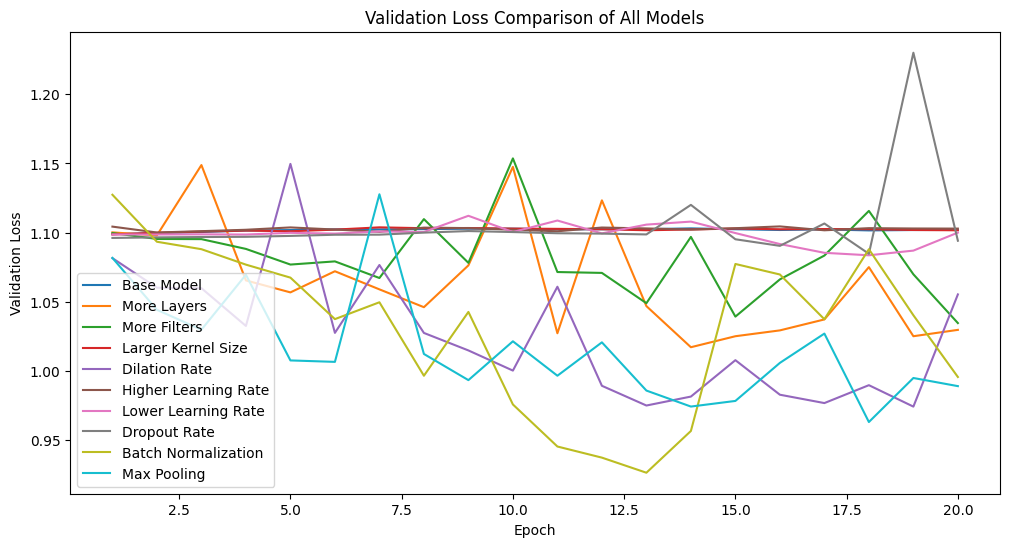

In [ ]:
# Extract training validation loss
val_loss_base = history_base.history['val_loss']
val_loss_layer = history_base_layers.history['val_loss']
val_loss_filters = history_base_filters.history['val_loss']
val_loss_kernel_size = history_base_kernel_size.history['val_loss']
val_loss_dilation = history_base_dilation.history['val_loss']
val_loss_higher_learning_rate = history_base_higher_learning_rate.history['val_loss']
val_loss_lower_learning_rate = history_base_lower_learning_rate.history['val_loss']
val_loss_dropout_rate = history_base_dropout_rate.history['val_loss']
val_loss_batch_normalization = history_base_batch_normalization.history['val_loss']
val_loss_max_pool = history_base_max_pool.history['val_loss']

# Plot
plt.figure(figsize=(12, 6))

plt.plot(epochs, val_loss_base, label='Base Model')
plt.plot(epochs, val_loss_layer, label='More Layers')
plt.plot(epochs, val_loss_filters, label='More Filters')
plt.plot(epochs, val_loss_kernel_size, label='Larger Kernel Size')
plt.plot(epochs, val_loss_dilation, label='Dilation Rate')
plt.plot(epochs, val_loss_higher_learning_rate, label='Higher Learning Rate')
plt.plot(epochs, val_loss_lower_learning_rate, label='Lower Learning Rate')
plt.plot(epochs, val_loss_dropout_rate, label='Dropout Rate')
plt.plot(epochs, val_loss_batch_normalization, label='Batch Normalization')
plt.plot(epochs, val_loss_max_pool, label='Max Pooling')

plt.title('Validation Loss Comparison of All Models')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()


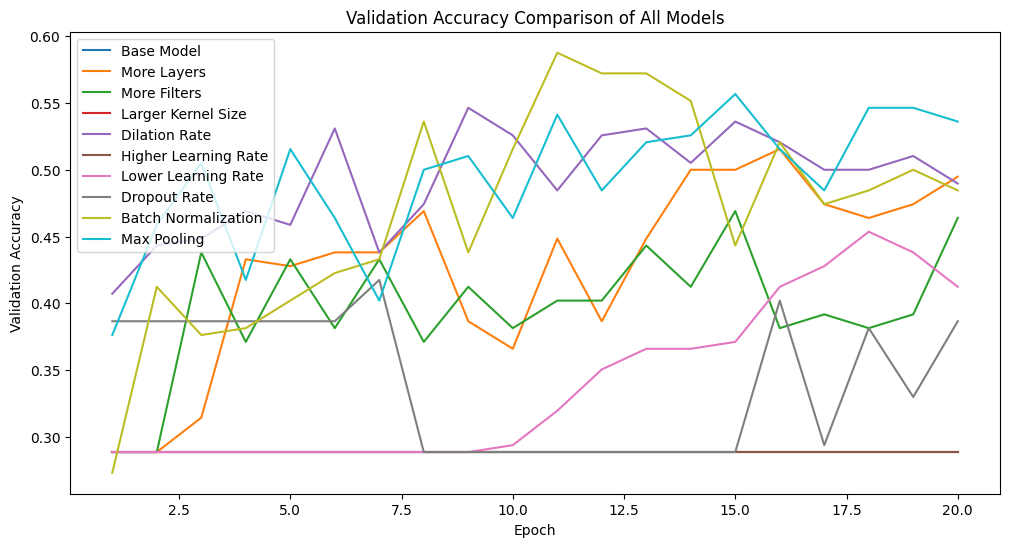

In [ ]:
# Extract training validation accuracy
val_acc_base = history_base.history['val_accuracy']
val_acc_layer = history_base_layers.history['val_accuracy']
val_acc_filters = history_base_filters.history['val_accuracy']
val_acc_kernel_size = history_base_kernel_size.history['val_accuracy']
val_acc_dilation = history_base_dilation.history['val_accuracy']
val_acc_higher_learning_rate = history_base_higher_learning_rate.history['val_accuracy']
val_acc_lower_learning_rate = history_base_lower_learning_rate.history['val_accuracy']
val_acc_dropout_rate = history_base_dropout_rate.history['val_accuracy']
val_acc_batch_normalization = history_base_batch_normalization.history['val_accuracy']
val_acc_max_pool = history_base_max_pool.history['val_accuracy']

#Plot
plt.figure(figsize=(12, 6))

plt.plot(epochs, val_acc_base, label='Base Model')
plt.plot(epochs, val_acc_layer, label='More Layers')
plt.plot(epochs, val_acc_filters, label='More Filters')
plt.plot(epochs, val_acc_kernel_size, label='Larger Kernel Size')
plt.plot(epochs, val_acc_dilation, label='Dilation Rate')
plt.plot(epochs, val_acc_higher_learning_rate, label='Higher Learning Rate')
plt.plot(epochs, val_acc_lower_learning_rate, label='Lower Learning Rate')
plt.plot(epochs, val_acc_dropout_rate, label='Dropout Rate')
plt.plot(epochs, val_acc_batch_normalization, label='Batch Normalization')
plt.plot(epochs, val_acc_max_pool, label='Max Pooling')

plt.title('Validation Accuracy Comparison of All Models')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()


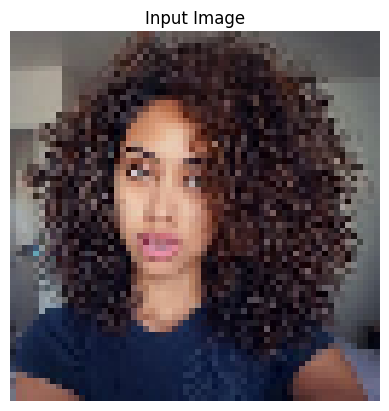

In [ ]:
img = keras.preprocessing.image.load_img(
    "hair_types_data/hair_types/Curly_Hair/02dac897d1dec9ba8c057a11d041ada8--layered-natural-hair-natural-black-hairstyles.jpg",
    target_size=image_size #change relative path
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

#Display Image for better visualization
plt.imshow(img)
plt.title("Input Image")
plt.axis("off")
plt.show()

Prediction

In [ ]:
#Base Model
predictions_base = base_model.predict(img_array)
result_base = (
    "Base Model\n"
    "Curly hair: {:.2f}%\n"
    "Straight hair: {:.2f}%\n"
    "Wavy hair: {:.2f}%"
).format(*(predictions_base[0] * 100))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


In [ ]:
#More Layers
predictions_layers = base_model_layers.predict(img_array)
result_layers = (
    "More Layers Model\n"
    "Curly hair: {:.2f}%\n"
    "Straight hair: {:.2f}%\n"
    "Wavy hair: {:.2f}%"
).format(*(predictions_layers[0] * 100))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


In [ ]:
#More Filter
predictions_filters = base_model_filters.predict(img_array)
result_filters = (
    "More Filters Model\n"
    "Curly hair: {:.2f}%\n"
    "Straight hair: {:.2f}%\n"
    "Wavy hair: {:.2f}%"
).format(*(predictions_filters[0] * 100))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


In [ ]:
#Larger Kernel Size
predictions_kernel_size = base_model_kernel_size.predict(img_array)
result_kernel_size = (
    "Larger Kernel Size Model\n"
    "Curly hair: {:.2f}%\n"
    "Straight hair: {:.2f}%\n"
    "Wavy hair: {:.2f}%"
).format(*(predictions_kernel_size[0] * 100))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


In [ ]:
#With Dilation Rate
predictions_dilation = base_model_dilation.predict(img_array)
result_dilation = (
    "Dilation Rate Model\n"
    "Curly hair: {:.2f}%\n"
    "Straight hair: {:.2f}%\n"
    "Wavy hair: {:.2f}%"
).format(*(predictions_dilation[0] * 100))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


In [ ]:
#Higher Learning Rate
predictions_higher_lr = base_model_higher_learning_rate.predict(img_array)
result_higher_lr = (
    "Higher Learning Rate Model\n"
    "Curly hair: {:.2f}%\n"
    "Straight hair: {:.2f}%\n"
    "Wavy hair: {:.2f}%"
).format(*(predictions_higher_lr[0] * 100))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


In [ ]:
#Lower Learning Rate
predictions_lower_lr = base_model_lower_learning_rate.predict(img_array)
result_lower_lr = (
    "Lower Learning Rate Model\n"
    "Curly hair: {:.2f}%\n"
    "Straight hair: {:.2f}%\n"
    "Wavy hair: {:.2f}%"
).format(*(predictions_lower_lr[0] * 100))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


In [ ]:
#With Dropout Rate
predictions_dropout = base_model_dropout_rate.predict(img_array)
result_dropout = (
    "Dropout Rate Model\n"
    "Curly hair: {:.2f}%\n"
    "Straight hair: {:.2f}%\n"
    "Wavy hair: {:.2f}%"
).format(*(predictions_dropout[0] * 100))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


In [ ]:
#With Batch Normalization
predictions_bn = base_model_batch_normalization.predict(img_array)
result_bn = (
    "Batch Normalization Model\n"
    "Curly hair: {:.2f}%\n"
    "Straight hair: {:.2f}%\n"
    "Wavy hair: {:.2f}%"
).format(*(predictions_bn[0] * 100))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


In [ ]:
#With Max Pooling
predictions_max_pool = base_model_max_pool.predict(img_array)
result_max_pool = (
    "Max Pooling Model\n"
    "Curly hair: {:.2f}%\n"
    "Straight hair: {:.2f}%\n"
    "Wavy hair: {:.2f}%"
).format(*(predictions_max_pool[0] * 100))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Print Results

In [ ]:
print(result_base)
print()
print(result_layers)
print()
print(result_filters)
print()
print(result_kernel_size)
print()
print(result_dilation)
print()
print(result_higher_lr)
print()
print(result_lower_lr)
print()
print(result_dropout)
print()
print(result_bn)
print()
print(result_max_pool)
print()



Base Model
Curly hair: 35.18%
Straight hair: 31.72%
Wavy hair: 33.10%

More Layers Model
Curly hair: 75.90%
Straight hair: 20.32%
Wavy hair: 3.79%

More Filters Model
Curly hair: 65.23%
Straight hair: 22.46%
Wavy hair: 12.31%

Larger Kernel Size Model
Curly hair: 35.18%
Straight hair: 31.53%
Wavy hair: 33.29%

Dilation Rate Model
Curly hair: 90.00%
Straight hair: 8.28%
Wavy hair: 1.72%

Higher Learning Rate Model
Curly hair: 35.44%
Straight hair: 31.74%
Wavy hair: 32.82%

Lower Learning Rate Model
Curly hair: 72.07%
Straight hair: 15.26%
Wavy hair: 12.66%

Dropout Rate Model
Curly hair: 28.90%
Straight hair: 34.28%
Wavy hair: 36.83%

Batch Normalization Model
Curly hair: 67.91%
Straight hair: 29.30%
Wavy hair: 2.78%

Max Pooling Model
Curly hair: 87.24%
Straight hair: 5.39%
Wavy hair: 7.37%

